In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('outputs/words_stss_table_20250512_115447.xlsx')
df.head()

,Word,rashi,other,horayot,taanit,meila
0,לא,12708,1752,164,311,286
1,על,7506,762,170,186,74
2,הוא,7387,599,122,151,89
3,אלא,6862,963,92,176,148
4,ליה,5945,754,59,122,99


In [4]:
#df.Word.unique()

In [5]:
#df.drop(index=[0,1,2,3,4,5,75420], inplace=True)
#df.reset_index(drop=True, inplace=True)


In [6]:
df.sort_values(by=['rashi'], inplace=True, ascending=False)
df.head(10)

,Word,rashi,other,horayot,taanit,meila
0,לא,12708,1752,164,311,286
1,על,7506,762,170,186,74
2,הוא,7387,599,122,151,89
3,אלא,6862,963,92,176,148
4,ליה,5945,754,59,122,99
5,ולא,5840,665,103,136,122
6,של,5515,455,49,163,101
7,לו,4482,619,47,78,40
8,את,4177,418,23,123,34
9,כל,4054,450,77,194,51


In [7]:
for column in df.columns:
    if column == "Word": continue
    df[f'{column}_chance'] = df[column] / df[column].sum()
df.head(10)

,Word,rashi,other,horayot,taanit,meila,rashi_chance,other_chance,horayot_chance,taanit_chance,meila_chance
0,לא,12708,1752,164,311,286,0.014347,0.017644,0.012423,0.012285,0.017306
1,על,7506,762,170,186,74,0.008474,0.007674,0.012878,0.007347,0.004478
2,הוא,7387,599,122,151,89,0.008340,0.006032,0.009242,0.005965,0.005385
3,אלא,6862,963,92,176,148,0.007747,0.009698,0.006969,0.006952,0.008956
4,ליה,5945,754,59,122,99,0.006712,0.007593,0.004469,0.004819,0.005991
5,ולא,5840,665,103,136,122,0.006593,0.006697,0.007802,0.005372,0.007382
6,של,5515,455,49,163,101,0.006226,0.004582,0.003712,0.006439,0.006112
7,לו,4482,619,47,78,40,0.005060,0.006234,0.003560,0.003081,0.002420
8,את,4177,418,23,123,34,0.004716,0.004209,0.001742,0.004859,0.002057
9,כל,4054,450,77,194,51,0.004577,0.004532,0.005833,0.007663,0.003086


In [8]:
def get_similarity(row, column):
    from_rashi = abs(row['rashi_chance'] - row[column])
    from_other = abs(row['other_chance'] - row[column])
    if from_rashi < from_other:
        return 'rashi'
    elif from_other < from_rashi:
        return 'other'
    else:
        return 'same'

target_masechet = ['horayot','taanit', 'meila']
for column in target_masechet:
    cname = f"{column}_similarity"
    df[cname] = df.apply(lambda row: get_similarity(row, f'{column}_chance'), axis=1)


In [9]:
df.head()

,Word,rashi,other,horayot,taanit,meila,rashi_chance,other_chance,horayot_chance,taanit_chance,meila_chance,horayot_similarity,taanit_similarity,meila_similarity
0,לא,12708,1752,164,311,286,0.014347,0.017644,0.012423,0.012285,0.017306,rashi,rashi,other
1,על,7506,762,170,186,74,0.008474,0.007674,0.012878,0.007347,0.004478,rashi,other,other
2,הוא,7387,599,122,151,89,0.008340,0.006032,0.009242,0.005965,0.005385,rashi,other,other
3,אלא,6862,963,92,176,148,0.007747,0.009698,0.006969,0.006952,0.008956,rashi,rashi,other
4,ליה,5945,754,59,122,99,0.006712,0.007593,0.004469,0.004819,0.005991,rashi,rashi,rashi


<Axes: title={'center': 'Taanit'}, ylabel='taanit_similarity'>

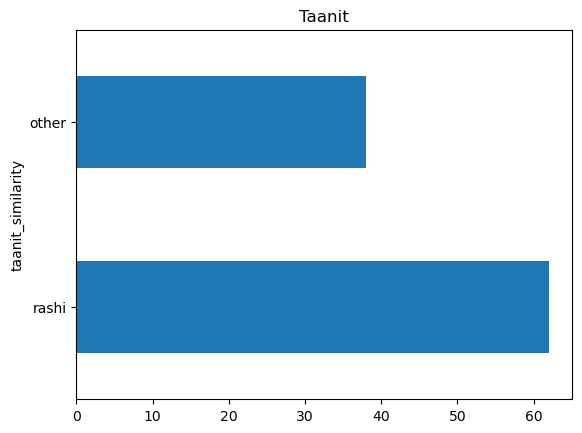

In [10]:
top_100 = df.nlargest(100, 'rashi_chance')
top_100.value_counts('taanit_similarity').sort_index(ascending=False).plot(kind='barh', title='Taanit')

<Axes: title={'center': 'Taanit'}, ylabel='count'>

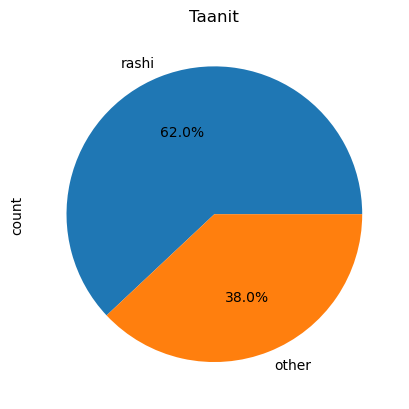

In [11]:
# pie plot with % each
top_100.value_counts('taanit_similarity').sort_index(ascending=False).plot(kind='pie', title='Taanit', autopct='%1.1f%%')


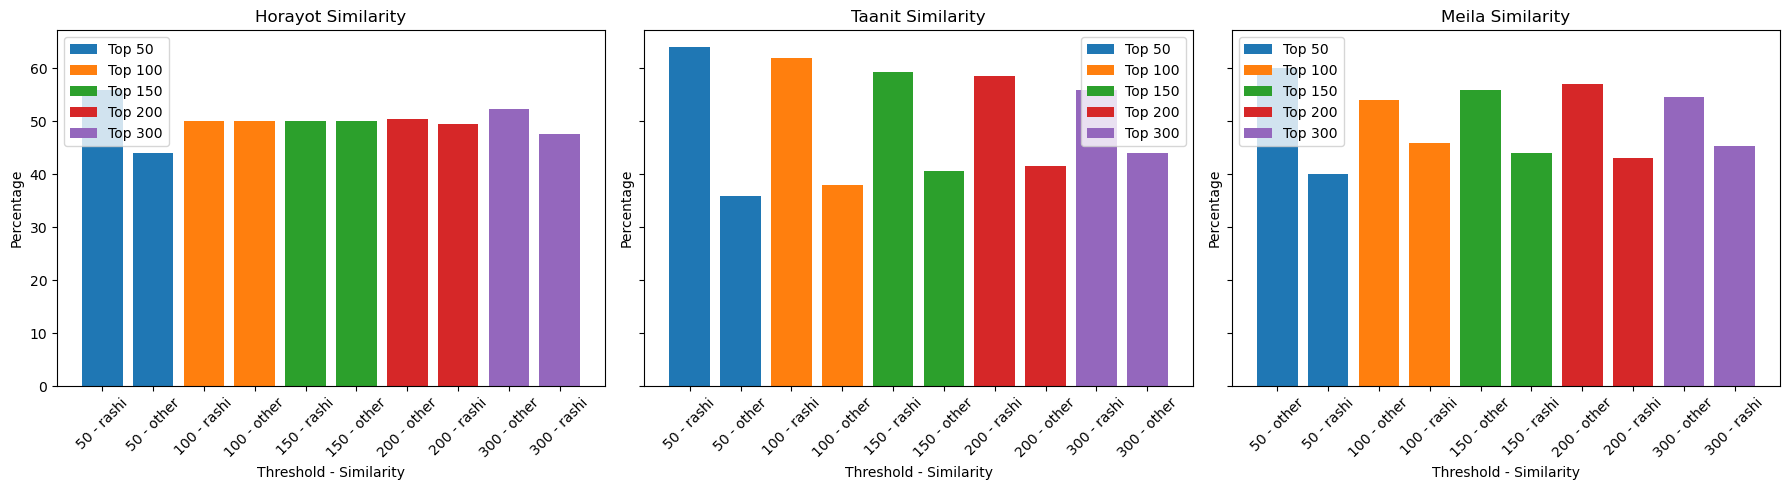

In [12]:
import matplotlib.pyplot as plt
# Define thresholds for top 'rashi_chance' rows
thresholds = [50, 100, 150, 200, 300]

# Dictionary to store percentages
results = {threshold: {} for threshold in thresholds}

# Calculate value percentages for each threshold and masechet
for threshold in thresholds:
    top_df = df.nlargest(threshold, 'rashi_chance')
    for masechet in target_masechet:
        col = f"{masechet}_similarity"
        if col in top_df.columns:
            counts = top_df[col].value_counts(normalize=True) * 100
            results[threshold][masechet] = counts
        else:
            results[threshold][masechet] = {}

# Set up subplots
fig, axes = plt.subplots(1, len(target_masechet), figsize=(6 * len(target_masechet), 5), sharey=True)

# Ensure axes is iterable
if len(target_masechet) == 1:
    axes = [axes]

# Plot each masechet
for i, masechet in enumerate(target_masechet):
    ax = axes[i]
    for threshold in thresholds:
        counts = results[threshold].get(masechet, {})
        if not counts.empty:
            labels = [f"{threshold} - {key}" for key in counts.index]
            ax.bar(labels, counts.values, label=f"Top {threshold}")
    ax.set_title(f"{masechet.capitalize()} Similarity")
    ax.set_xlabel("Threshold - Similarity")
    ax.set_ylabel("Percentage")
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()


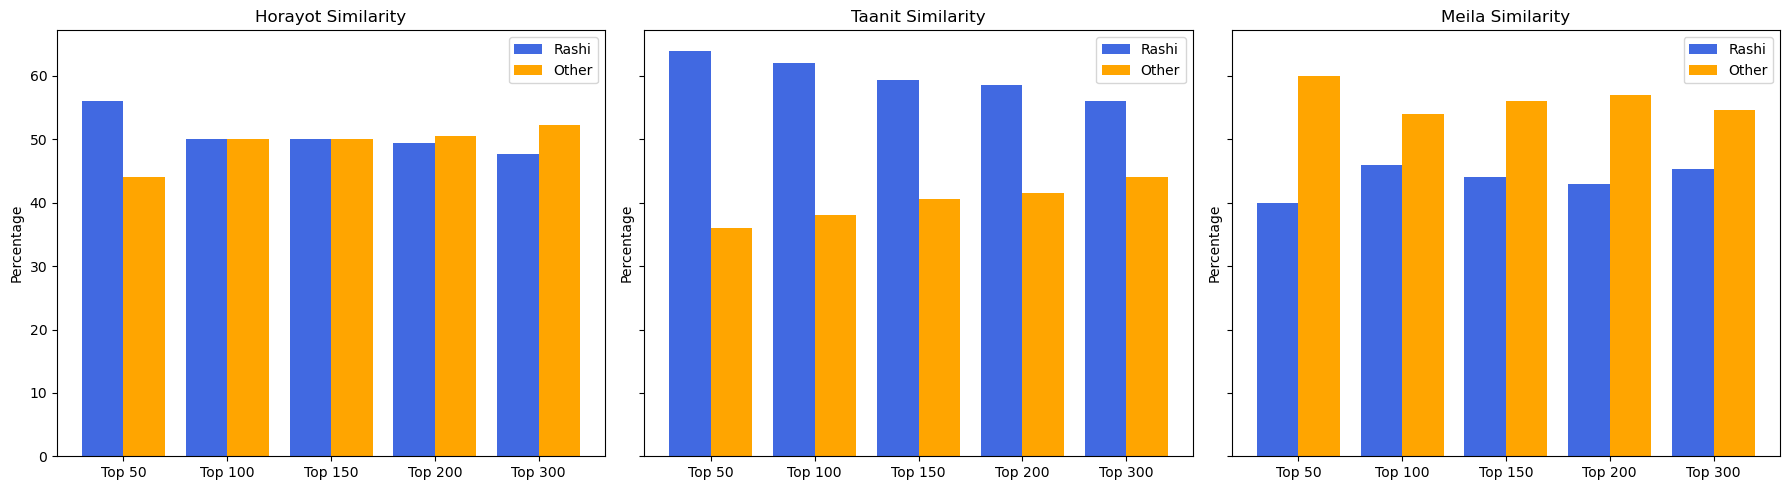

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define thresholds and initialize structure
thresholds = [50, 100, 150, 200, 300]
rashi_label = 'rashi'
other_label = 'other'
target_masechet = ['horayot', 'taanit', 'meila']

# Prepare data structure: {masechet: {threshold: (rashi_pct, other_pct)}}
results = {masechet: {} for masechet in target_masechet}

for threshold in thresholds:
    top_df = df.nlargest(threshold, 'rashi_chance')
    for masechet in target_masechet:
        col = f"{masechet}_similarity"
        if col in top_df.columns:
            counts = top_df[col].value_counts(normalize=True) * 100
            rashi_pct = counts.get(rashi_label, 0)
            other_pct = counts.get(other_label, 0)
            results[masechet][threshold] = (rashi_pct, other_pct)
        else:
            results[masechet][threshold] = (0, 0)

# Plot
fig, axes = plt.subplots(1, len(target_masechet), figsize=(6 * len(target_masechet), 5), sharey=True)

if len(target_masechet) == 1:
    axes = [axes]

x = np.arange(len(thresholds))  # bar positions

for i, masechet in enumerate(target_masechet):
    ax = axes[i]
    rashi_vals = [results[masechet][t][0] for t in thresholds]
    other_vals = [results[masechet][t][1] for t in thresholds]

    ax.bar(x - 0.2, rashi_vals, width=0.4, label='Rashi', color='royalblue')
    ax.bar(x + 0.2, other_vals, width=0.4, label='Other', color='orange')

    ax.set_xticks(x)
    ax.set_xticklabels([f"Top {t}" for t in thresholds])
    ax.set_title(f"{masechet.capitalize()} Similarity")
    ax.set_ylabel("Percentage")
    ax.legend()

plt.tight_layout()
plt.show()


In [14]:
df.shape

(85088, 14)

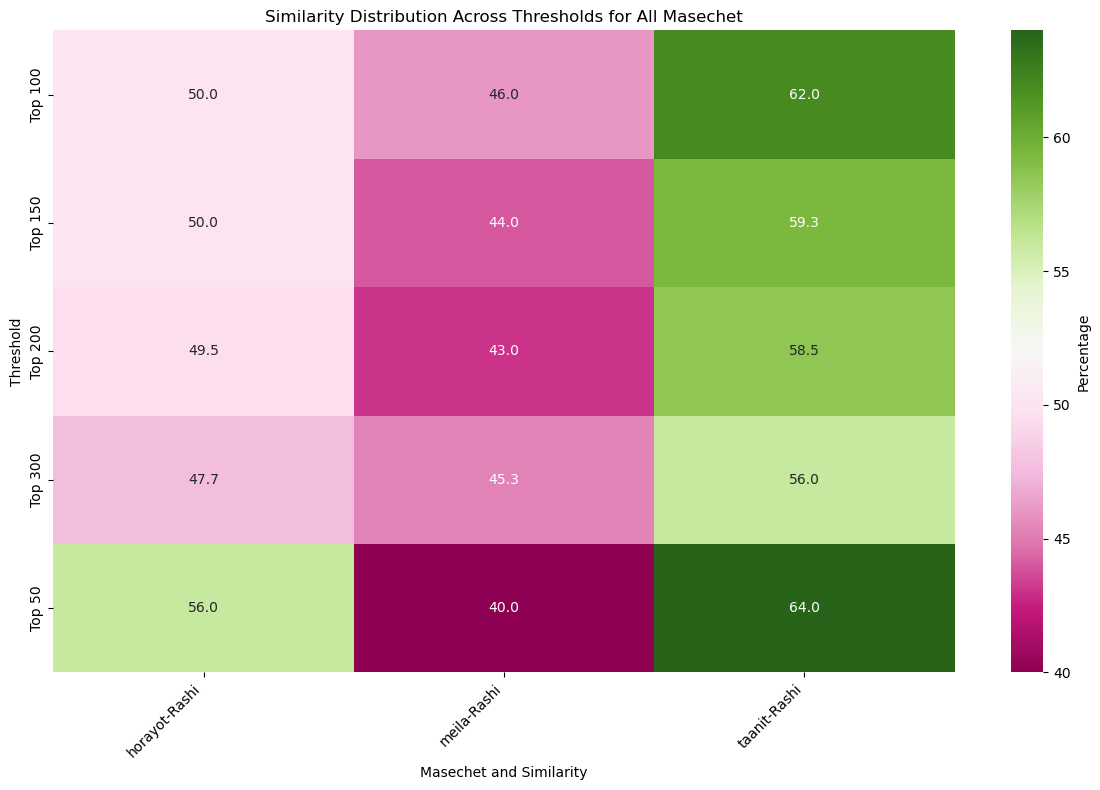

In [15]:
import seaborn as sns
import pandas as pd

# Graph Name: "Similarity Distribution Across Thresholds for All Masechet"
# Goal: To visualize the distribution of 'rashi' and 'other' similarities across all thresholds and masechet in a single heatmap.
# This provides a clear overview of how the proportions of similarities change as we increase the threshold for each masechet.


# Prepare data for heatmap
heatmap_data = []
for masechet in target_masechet:
    for threshold in thresholds:
        rashi_pct, other_pct = results[masechet][threshold]
        heatmap_data.append({'Masechet': masechet, 'Threshold': f'Top {threshold}', 'Similarity': 'Rashi', 'Percentage': rashi_pct})
        #heatmap_data.append({'Masechet': masechet, 'Threshold': f'Top {threshold}', 'Similarity': 'Other', 'Percentage': other_pct})

heatmap_df = pd.DataFrame(heatmap_data)

# Pivot data for heatmap
pivot_df = heatmap_df.pivot_table(index='Threshold', columns=['Masechet', 'Similarity'], values='Percentage')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="PiYG", cbar_kws={'label': 'Percentage'})
plt.title("Similarity Distribution Across Thresholds for All Masechet")
plt.ylabel("Threshold")
plt.xlabel("Masechet and Similarity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
words_indexes = np.array(df.index)
words_indexes


array([    0,     1,     2, ..., 81009, 81008, 85087])

In [22]:
words_indexes = words_indexes[(words_indexes > 49) & (words_indexes < 10001)]

In [23]:
rashi_similarity_prc = [df.iloc[:i]['meila_similarity'].value_counts(normalize=True)['rashi'] for i in words_indexes if i > 49 and i <10001]


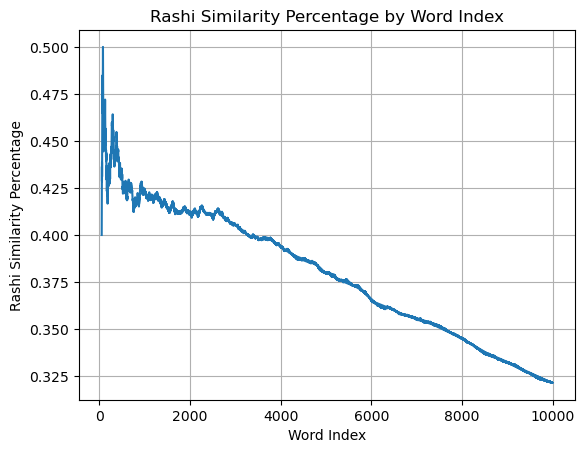

In [26]:
# plot rashi_similarity_prc by words_indexes
plt.plot(words_indexes, rashi_similarity_prc)
plt.title('Rashi Similarity Percentage by Word Index')
plt.xlabel('Word Index')
plt.ylabel('Rashi Similarity Percentage')
plt.grid()
plt.show()

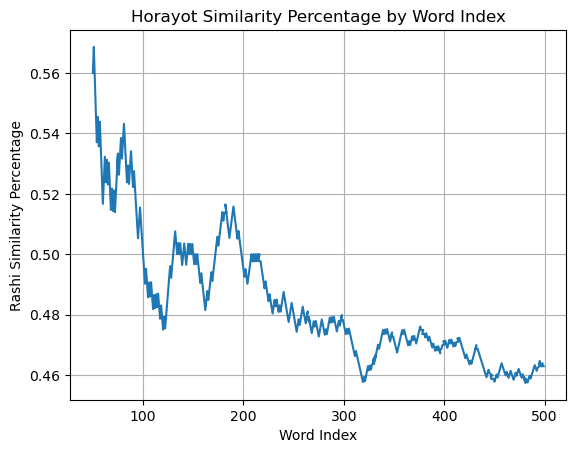

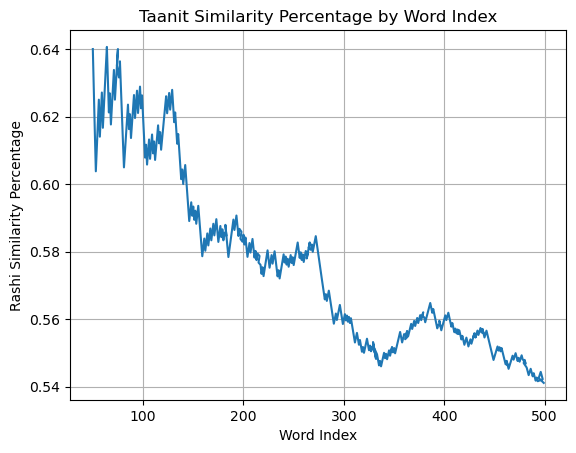

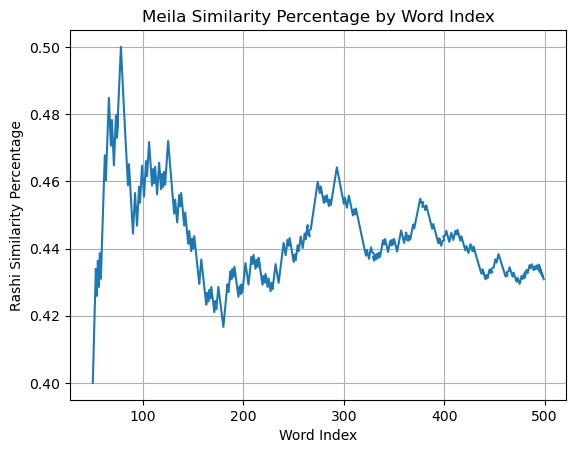

In [32]:
def plot_similarity_by_index(df, column_name, threshold=50):
    title = f"{column_name.capitalize()} Similarity Percentage by Word Index"
    column = f"{column_name}_similarity"
    words_indexes = np.array(df.index)
    words_indexes = words_indexes[(words_indexes > 49) & (words_indexes < threshold)]
    
    similarity_prc = [
        df.iloc[:i][column].value_counts(normalize=True).get('rashi', 0) 
        for i in words_indexes if i > 49 and i < threshold
    ]
    
    plt.plot(words_indexes, similarity_prc)
    plt.title(title)
    plt.xlabel('Word Index')
    plt.ylabel('Rashi Similarity Percentage')
    plt.grid()
    plt.show()

plot_similarity_by_index(df, 'horayot', 500)
plot_similarity_by_index(df, 'taanit', 500)
plot_similarity_by_index(df, 'meila', 500)

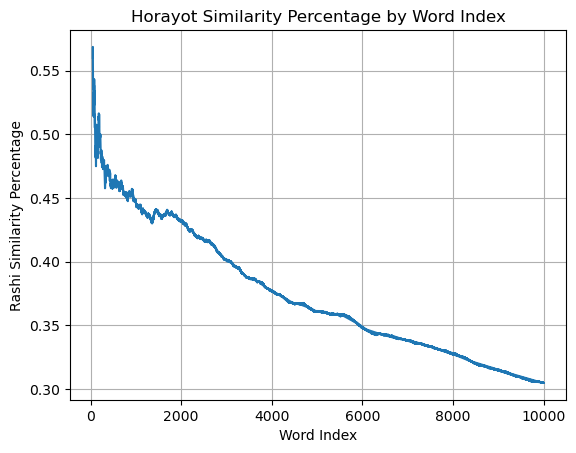

In [33]:
plot_similarity_by_index(df, 'horayot', 10000)


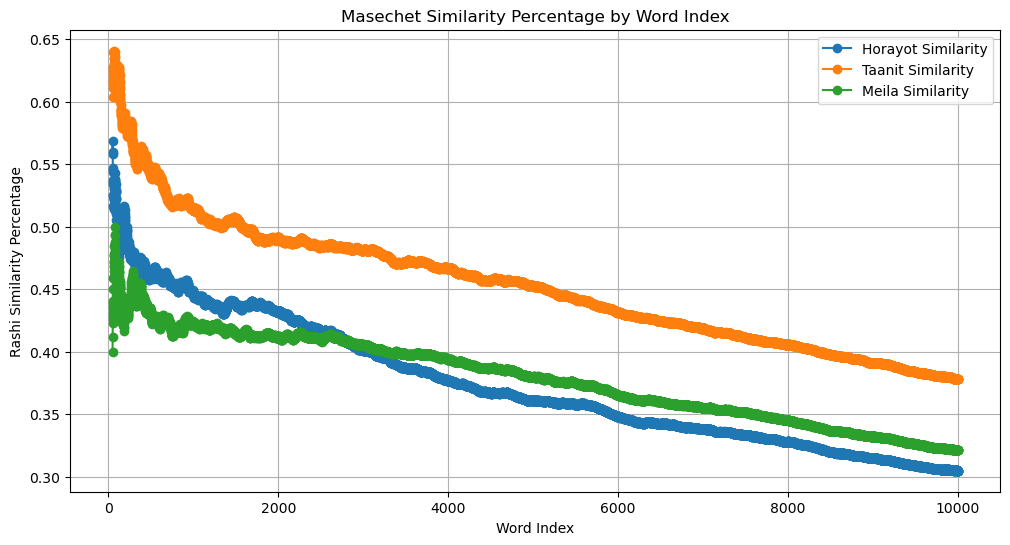

In [34]:
# make a very complex plot with all 3 masechet, be creative, make sure to use different colors and styles and have reaal insights
def plot_all_masechet_similarity(df, threshold=500):
    plt.figure(figsize=(12, 6))
    
    for column_name in target_masechet:
        column = f"{column_name}_similarity"
        words_indexes = np.array(df.index)
        words_indexes = words_indexes[(words_indexes > 49) & (words_indexes < threshold)]
        
        similarity_prc = [
            df.iloc[:i][column].value_counts(normalize=True).get('rashi', 0) 
            for i in words_indexes if i > 49 and i < threshold
        ]
        
        plt.plot(words_indexes, similarity_prc, label=f"{column_name.capitalize()} Similarity", linestyle='-', marker='o')
    
    plt.title("Masechet Similarity Percentage by Word Index")
    plt.xlabel('Word Index')
    plt.ylabel('Rashi Similarity Percentage')
    plt.legend()
    plt.grid()
    plt.show()
plot_all_masechet_similarity(df, 10000)

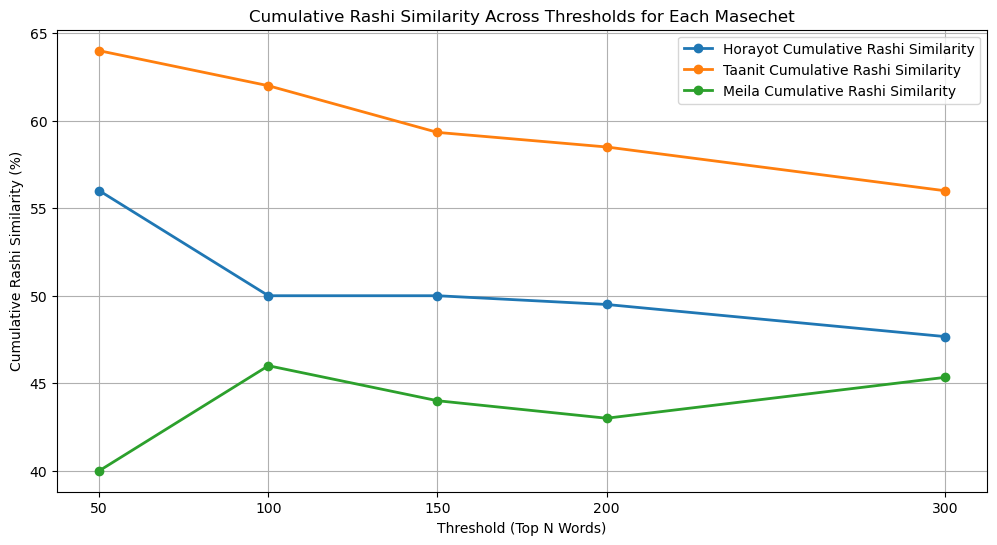

In [38]:
def plot_cumulative_similarity(df, thresholds, target_masechet):
    plt.figure(figsize=(12, 6))
    
    for masechet in target_masechet:
        cumulative_similarity = []
        for threshold in thresholds:
            top_df = df.nlargest(threshold, 'rashi_chance')
            col = f"{masechet}_similarity"
            if col in top_df.columns:
                rashi_pct = top_df[col].value_counts(normalize=True).get('rashi', 0) * 100
                cumulative_similarity.append(rashi_pct)
            else:
                cumulative_similarity.append(0)
        
        plt.plot(thresholds, cumulative_similarity, label=f"{masechet.capitalize()} Cumulative Rashi Similarity", 
                 marker='o', linestyle='-', linewidth=2)
    
    plt.title("Cumulative Rashi Similarity Across Thresholds for Each Masechet")
    plt.xlabel("Threshold (Top N Words)")
    plt.ylabel("Cumulative Rashi Similarity (%)")
    plt.xticks(thresholds)
    plt.legend()
    plt.grid()
    plt.show()

plot_cumulative_similarity(df, thresholds, target_masechet)

In [ ]:
# Save the DataFrame to a new Excel file
output_file = 'outputs/words_stss_table_20250512_115447_with_similarity.xlsx'
df.to_excel(output_file, index=False)
print(f"DataFrame saved to {output_file}")